In [1]:
pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pyccl as ccl
import sacc2

In [3]:
nbin = 4

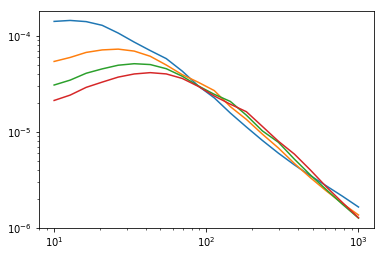

In [4]:
cosmo = ccl.Cosmology(Omega_c=0.25, Omega_b=0.05, h=0.72, n_s=0.96, A_s=2.1e-9)
N_z = []
spectra = []
z = np.arange(0., 3.0, 0.01)
for i in range(nbin):
    mean_z = 0.3*(1+i)
    sigma_z = 0.05
    n_z = np.exp(-0.5*(z - mean_z)**2 / sigma_z**2)
    N_z.append(n_z)
    
    bias = np.ones_like(z) * 1.5*(mean_z/0.3)**0.5
    T = ccl.NumberCountsTracer(cosmo, False, (z,N_z[i]), (z, bias))
    ell = np.logspace(1, 3, 20)
    cl = ccl.angular_cl(cosmo, T, T, ell)
    spectra.append((ell, cl))
    loglog(ell, cl)
    
    

In [5]:
S = sacc2.Sacc()
for i in range(nbin):
    S.add_tracer('NZ', f'bin_{i}', z, N_z[i])

    ell, cl = spectra[i]
    bin_name = f'bin_{i}'
    S.add_ell_cl('galaxy_density_cl', bin_name, bin_name, ell, cl)

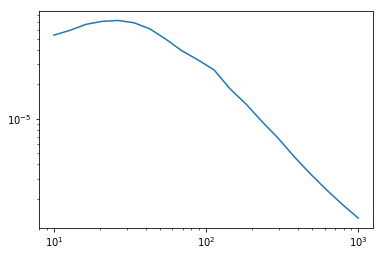

In [6]:
ell, cl = S.get_ell_cl('galaxy_density_cl', 'bin_1', 'bin_1')
loglog(ell, cl)

In [7]:
S.save('created-sacc2.sacc')